In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import empymod

sys.path.append('../')
import emulatte.forward as fwd

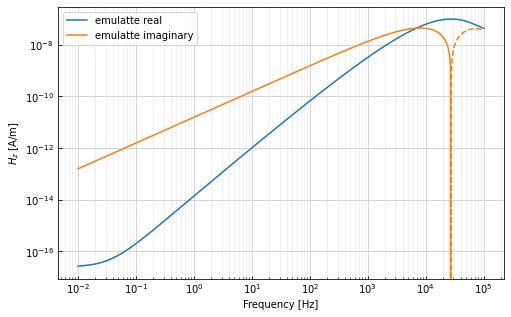

In [5]:
#emulatte1.0
thicks = []
res = [2e14, 100]
sc = [0, 0, 0]
rc = [100, 0, 0]
freqs = np.logspace(-2, 5, 500)
props = {'res' : res}

model = fwd.model(thicks)
model.set_properties(res=res)
vmd = fwd.transmitter('VMD', freqs, moment=1)
model.locate(vmd, sc, rc)
ans, freqtime = model.emulate(hankel_filter='werthmuller201', ignore_displacement_current=True)

hx = ans['h_x']
hy = ans['h_y']

hr = hx * 1 + hy * 0

re = hr.real
im = hr.imag

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111)
ax.plot(freqtime, re, "C0-", label='emulatte real')
ax.plot(freqtime, -re, "C0--")
ax.plot(freqtime, im, "C1-", label='emulatte imaginary')
ax.plot(freqtime, -im, "C1--")
ax.grid(which='major', c='#ccc')
ax.grid(which='minor', c='#eee')
plt.tick_params(which='both', direction='in')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('Frequency [Hz]')
ax.set_ylabel('$H_z$ [A/m]')
ax.legend()

In [5]:
model.k

array([0.02095845-9.41825784e-13j, 0.19924522-1.98139850e-01j,
       0.62849333-6.28143781e-01j, 0.19924522-1.98139850e-01j,
       0.06460321-6.11090661e-02j])